# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [72]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [73]:
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [74]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0 1.000000e+00  2015-02-06 22:24:17  2015-02-06 23:11:17   
1 2.000000e+00  2015-02-10 21:49:25  2015-02-10 22:33:25   
2 2.000000e+00  2015-02-16 00:11:35  2015-02-16 01:06:35   
3 1.000000e+00  2015-02-12 03:36:46  2015-02-12 04:35:46   
4 1.000000e+00  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4    1.000000e+00            4      3441   
1                      46    2.000000e+00            1      1900   
2                      36    3.000000e+00            4      4771   
3                      38    1.000000e+00            1      1525   
4                      38    1.000000e+00            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239           3.300000e+01   
1                   1            1400            1400           1.000000e+00   
2                   3             820            1604           8.000000e+00   
3                   1            1525            1525           5.000000e+00   
4                   2            1425            2195           5.000000e+00   

   total_busy_dashers  total_outstanding_orders     distance  
0        1.400000e+01              2.100000e+01 3.444000e+01  
1        2.000000e+00              2.000000e+00 2.760000e+01  
2        6.000000e+00              1.800000e+01 1.156000e+01  
3        6.000000e+00              8.000000e+00 3.180000e+01  
4        5.000000e+00              7.000000e+00 8.200000e+00

In [75]:
df.shape

(175777, 14)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [77]:
df.describe()

market_id  store_primary_category  order_protocol  total_items  \
count 1.757770e+05            1.757770e+05    1.757770e+05 1.757770e+05   
mean  2.743726e+00            3.588795e+01    2.911752e+00 3.204976e+00   
std   1.330963e+00            2.072825e+01    1.513128e+00 2.674055e+00   
min   1.000000e+00            0.000000e+00    1.000000e+00 1.000000e+00   
25%   2.000000e+00            1.800000e+01    1.000000e+00 2.000000e+00   
50%   2.000000e+00            3.800000e+01    3.000000e+00 3.000000e+00   
75%   4.000000e+00            5.500000e+01    4.000000e+00 4.000000e+00   
max   6.000000e+00            7.200000e+01    7.000000e+00 4.110000e+02   

          subtotal  num_distinct_items  min_item_price  max_item_price  \
count 1.757770e+05        1.757770e+05    1.757770e+05    1.757770e+05   
mean  2.697111e+03        2.675060e+00    6.849654e+02    1.160159e+03   
std   1.828555e+03        1.625681e+00    5.198829e+02    5.608286e+02   
min   0.000000e+00        1.000000e+00   -8.600000e+01    0.000000e+00   
25%   1.412000e+03        1.000000e+00    2.990000e+02    7.990000e+02   
50%   2.224000e+03        2.000000e+00    5.950000e+02    1.095000e+03   
75%   3.410000e+03        3.000000e+00    9.420000e+02    1.395000e+03   
max   2.680000e+04        2.000000e+01    1.470000e+04    1.470000e+04   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count           1.757770e+05        1.757770e+05              1.757770e+05   
mean            4.491866e+01        4.186138e+01              5.823012e+01   
std             3.454472e+01        3.216850e+01              5.273104e+01   
min            -4.000000e+00       -5.000000e+00             -6.000000e+00   
25%             1.700000e+01        1.500000e+01              1.700000e+01   
50%             3.700000e+01        3.500000e+01              4.100000e+01   
75%             6.600000e+01        6.300000e+01              8.500000e+01   
max             1.710000e+02        1.540000e+02              2.850000e+02   

          distance  
count 1.757770e+05  
mean  2.184309e+01  
std   8.748712e+00  
min   0.000000e+00  
25%   1.536000e+01  
50%   2.176000e+01  
75%   2.812000e+01  
max   8.352000e+01

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [78]:
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object

In [79]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [80]:
df.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [81]:
'''There are no category / object based columns
but upon seeing the columns manually we see that the columns store_primary_category	- int64
order_protocol - float64 can we considered as categorical, therefore converting them to category'''

'There are no category / object based columns\nbut upon seeing the columns manually we see that the columns store_primary_category\t- int64\norder_protocol - float64 can we considered as categorical, therefore converting them to category'

In [82]:
df['store_primary_category'].value_counts()

store_primary_category
4     18183
55    15745
46    15586
13     9915
58     8995
      ...  
1        10
43        9
8         2
21        1
3         1
Name: count, Length: 73, dtype: int64

In [83]:
df['order_protocol'].value_counts()

order_protocol
1.000000e+00    48404
3.000000e+00    47125
5.000000e+00    41415
2.000000e+00    20890
4.000000e+00    17246
6.000000e+00      678
7.000000e+00       19
Name: count, dtype: int64

In [84]:
# Convert categorical features to category type

df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

In [85]:
df.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [86]:
# Calculate time taken in minutes
'''time taken for delivery can be calcuated as difference of order time and delivered time
actual_delivery_time, created_at as these both are datetime columns the difference can be taken'''

df['time_for_devlivery'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df['time_for_devlivery'].head()

0   4.700000e+01
1   4.400000e+01
2   5.500000e+01
3   5.900000e+01
4   4.600000e+01
Name: time_for_devlivery, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [87]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_day'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

In [88]:
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [89]:
df['isWeekend'].value_counts()

isWeekend
0    115026
1     60751
Name: count, dtype: int64

In [90]:
df['isWeekend'] = df['isWeekend'].astype('category')

In [91]:
# Drop unnecessary columns
df = df.drop(columns=['actual_delivery_time','created_at' ], axis = 1)
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_for_devlivery',
       'hour_of_day', 'day_of_week', 'isWeekend'],
      dtype='object')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [92]:
# Define target variable (y) and features (X)

X = df.drop(columns=['time_for_devlivery'])
y = df['time_for_devlivery']

In [93]:
X.shape

(175777, 15)

In [94]:
y.shape

(175777,)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [95]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [96]:
X_train.shape

(140621, 15)

In [97]:
y_train.shape

(140621,)

In [98]:
X_test.shape

(35156, 15)

In [99]:
y_test.shape

(35156,)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [100]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cata_cols = X.select_dtypes(include=['category']).columns.tolist()

In [101]:
num_cols

['market_id',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance']

In [102]:
cata_cols

['store_primary_category', 'order_protocol', 'isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

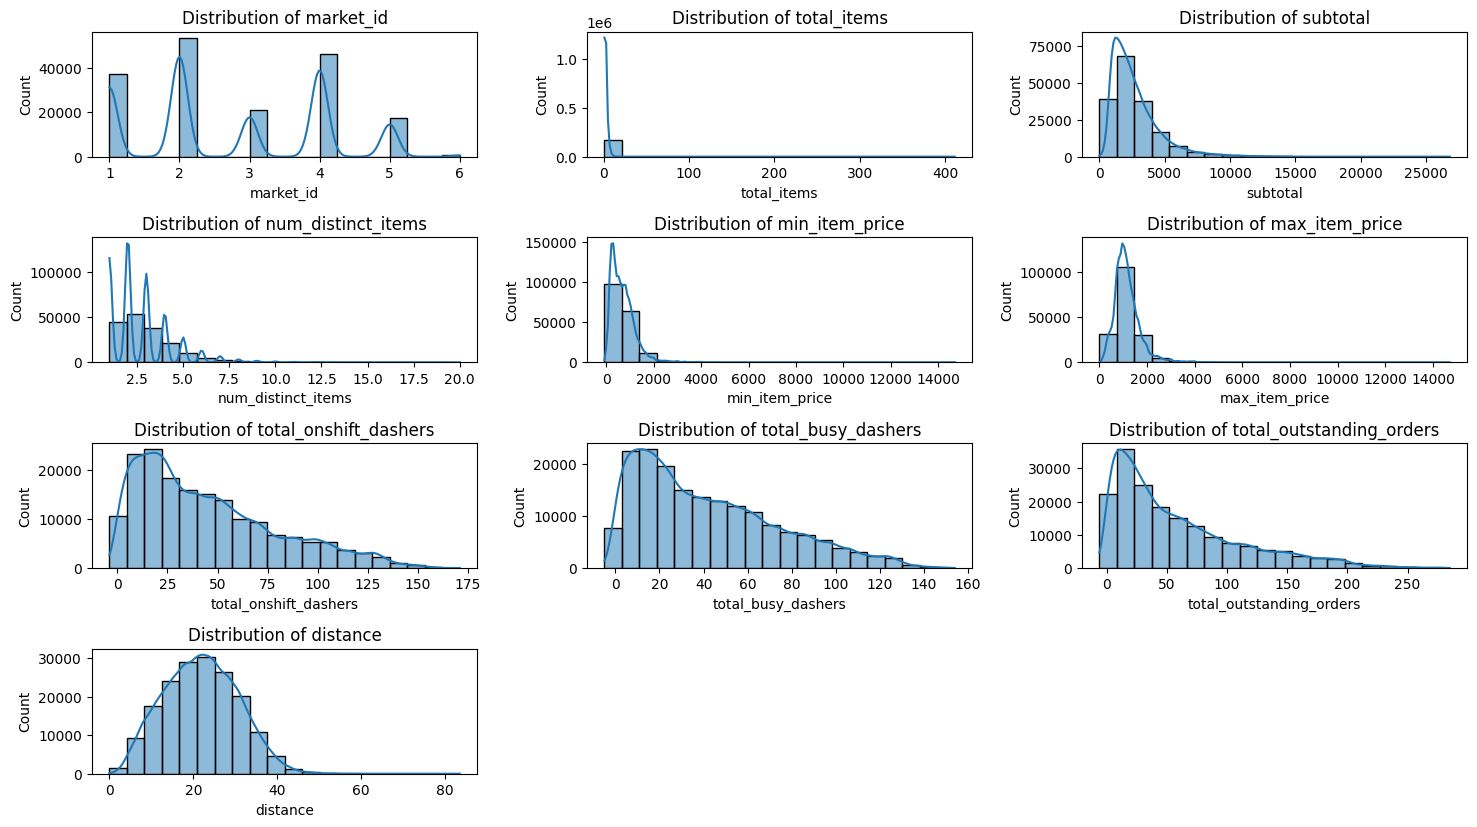

In [103]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i+1)
    sns.histplot(X[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

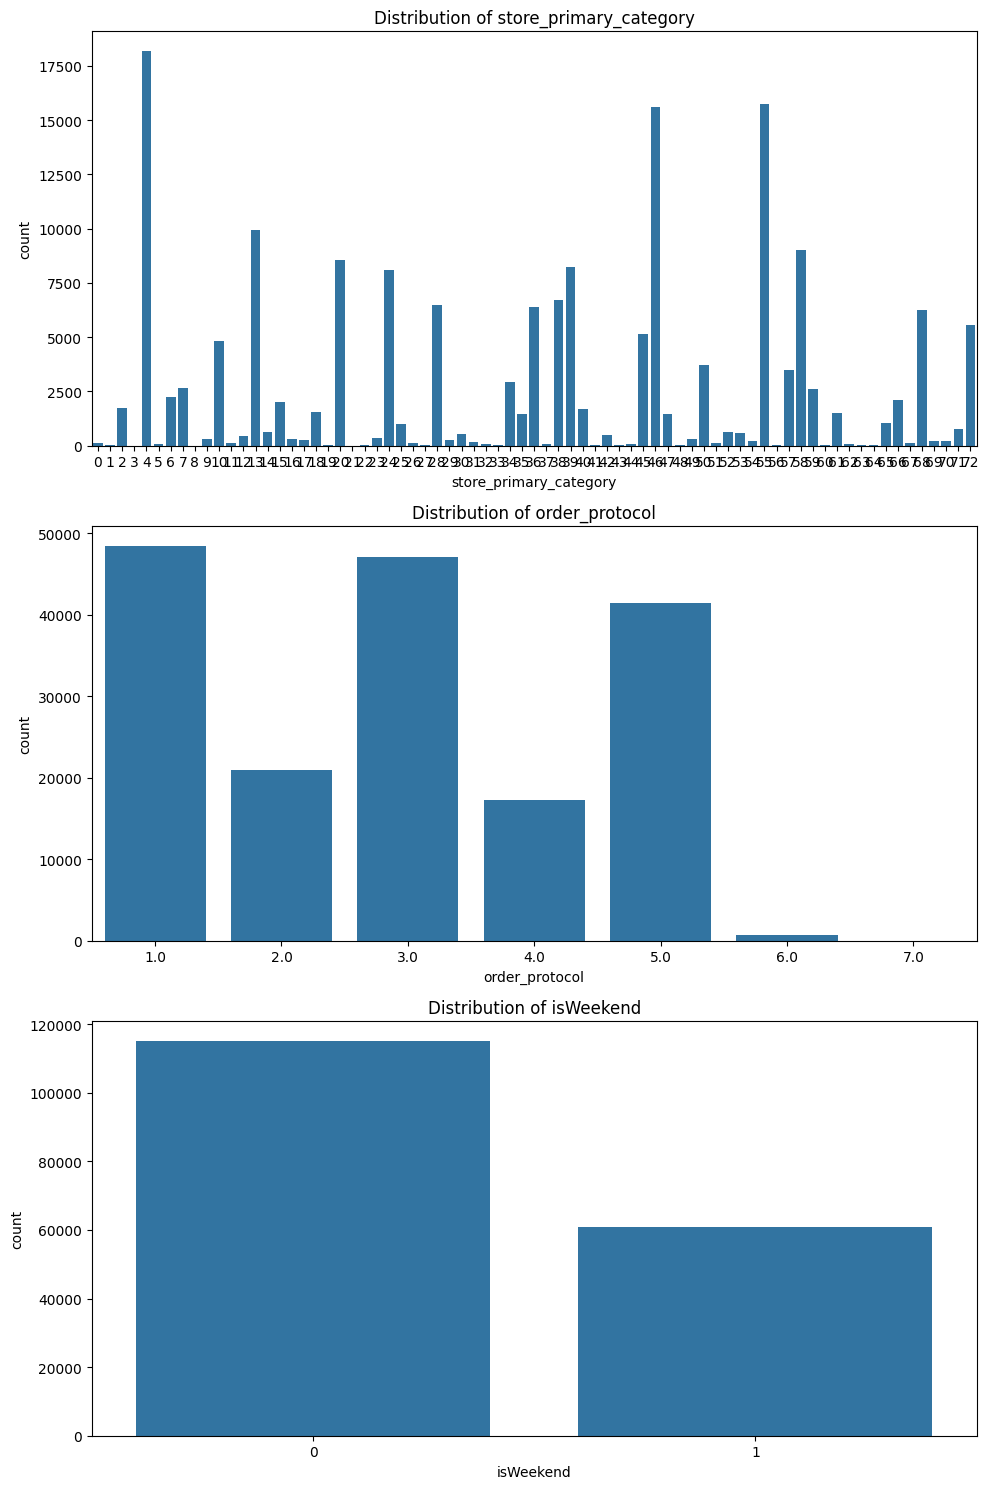

In [104]:
# Distribution of categorical columns
plt.figure(figsize=(10, 15))
for i, col in enumerate(cata_cols):
    plt.subplot(3, 1, i+1)
    sns.countplot(x=X[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

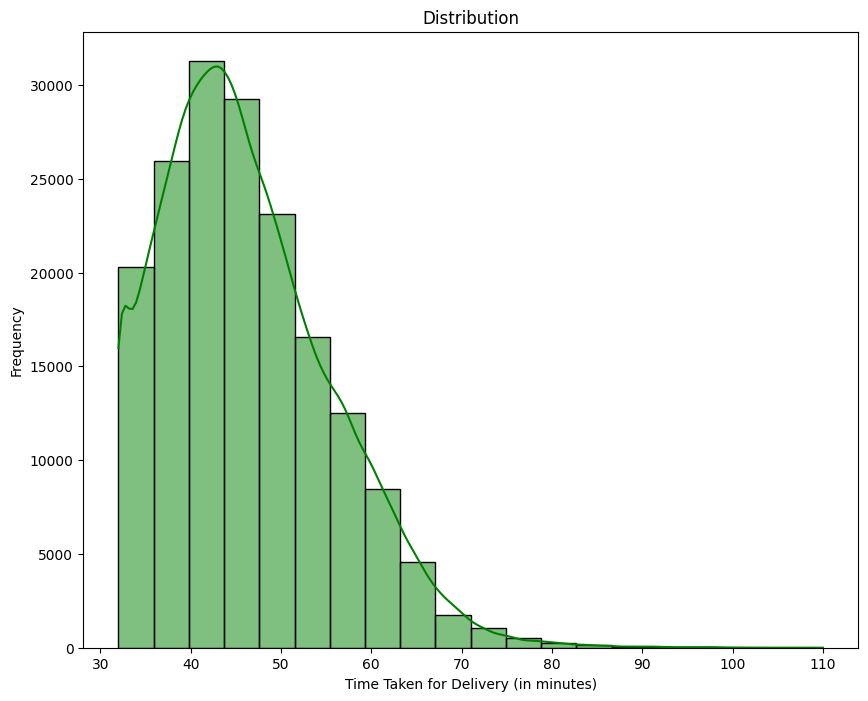

In [105]:
# Distribution of time_taken

plt.figure(figsize=(10, 8))
sns.histplot(y, bins=20, kde=True, color="green")
plt.title('Distribution')
plt.xlabel('Time Taken for Delivery (in minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [106]:
features = X.columns
features

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour_of_day', 'day_of_week',
       'isWeekend'],
      dtype='object')

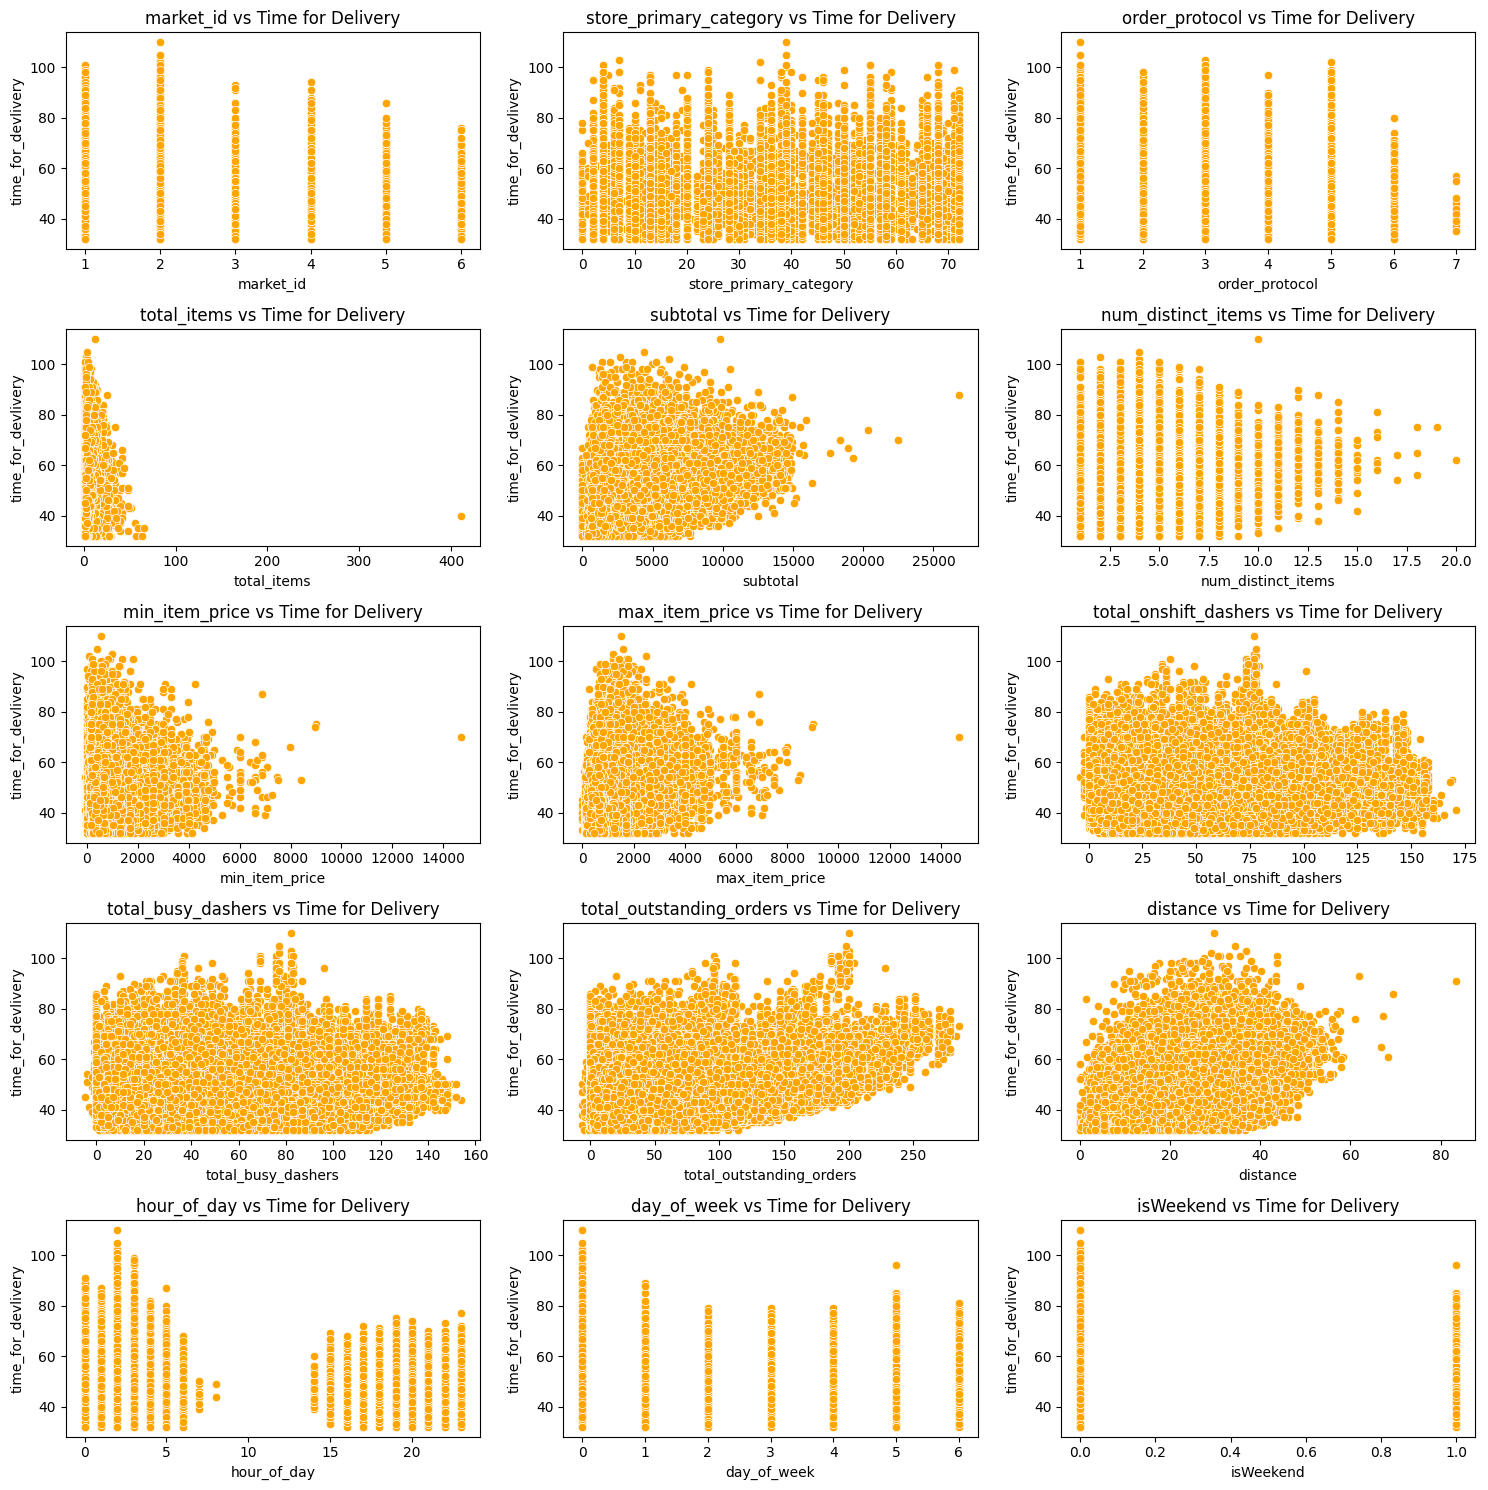

In [107]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    sns.scatterplot(x=X[feature], y=y, color = "orange")
    plt.title(f'{feature} vs Time for Delivery')
plt.tight_layout()
plt.show()


In [108]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_for_devlivery',
       'hour_of_day', 'day_of_week', 'isWeekend'],
      dtype='object')

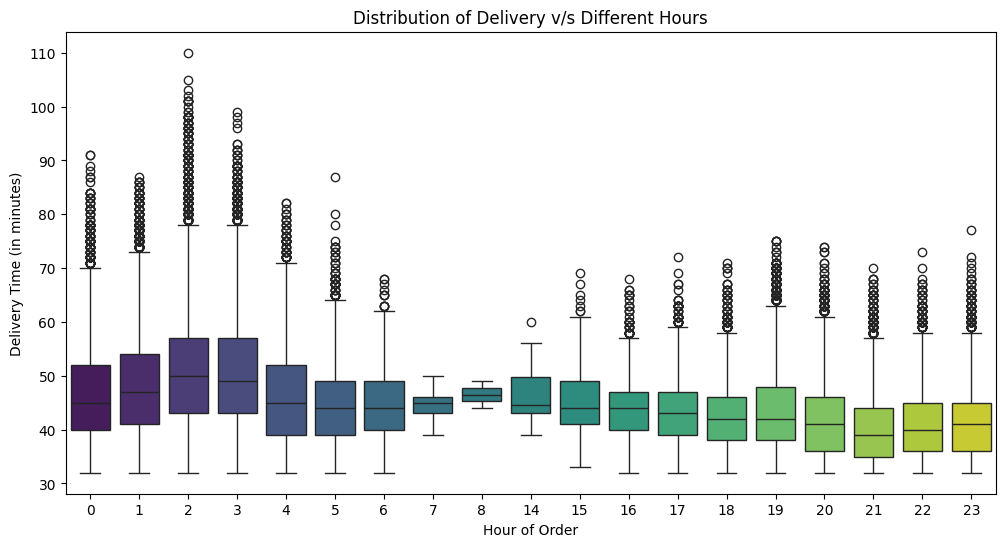

In [109]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['hour_of_day'], y=df['time_for_devlivery'], palette="viridis")

plt.title("Distribution of Delivery v/s Different Hours")
plt.xlabel("Hour of Order")
plt.ylabel("Delivery Time (in minutes)")

plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

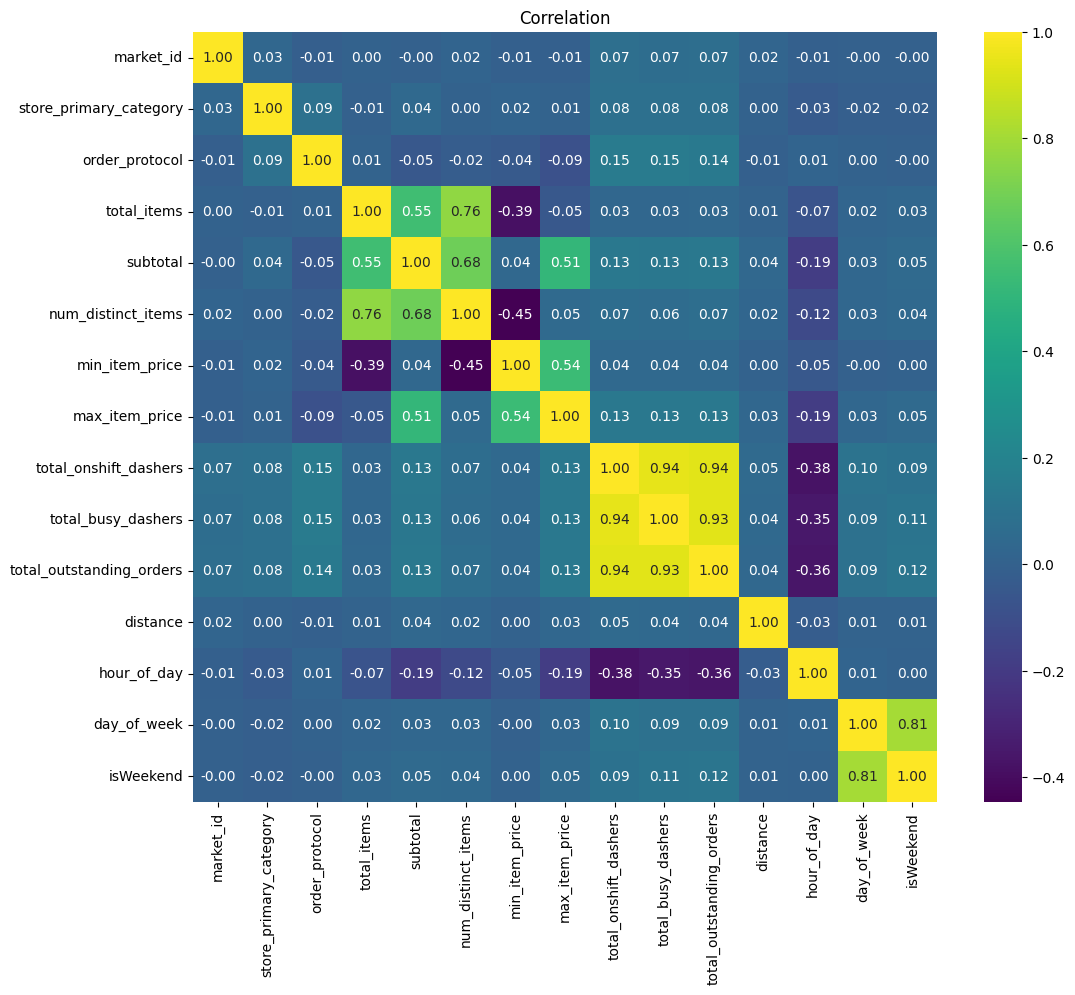

In [110]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
corr_val = X.corr()
sns.heatmap(corr_val, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [111]:
X.shape

(175777, 15)

In [112]:
# Drop 3-5 weakly correlated columns from training dataset

corr_rel = df.corr()
low_related_features = [col for col in corr_rel.columns if abs(corr_rel[col]['time_for_devlivery']) < 0.1]

X = X.drop(columns=low_related_features)

In [113]:
corr_rel

market_id  store_primary_category  \
market_id                 1.000000e+00            3.173306e-02   
store_primary_category    3.173306e-02            1.000000e+00   
order_protocol           -1.333994e-02            8.828145e-02   
total_items               3.567041e-03           -5.624018e-03   
subtotal                 -7.243859e-04            4.073433e-02   
num_distinct_items        1.550606e-02            1.571103e-03   
min_item_price           -1.093882e-02            1.606313e-02   
max_item_price           -7.259640e-03            6.188783e-03   
total_onshift_dashers     7.428866e-02            8.250062e-02   
total_busy_dashers        6.535110e-02            8.327444e-02   
total_outstanding_orders  6.822300e-02            8.169601e-02   
distance                  1.914110e-02            7.118634e-04   
time_for_devlivery       -7.301646e-02            2.697285e-02   
hour_of_day              -8.420849e-03           -3.402885e-02   
day_of_week              -6.804450e-04           -1.599759e-02   
isWeekend                -5.583682e-04           -1.703810e-02   

                          order_protocol   total_items      subtotal  \
market_id                  -1.333994e-02  3.567041e-03 -7.243859e-04   
store_primary_category      8.828145e-02 -5.624018e-03  4.073433e-02   
order_protocol              1.000000e+00  7.305140e-03 -5.188920e-02   
total_items                 7.305140e-03  1.000000e+00  5.549512e-01   
subtotal                   -5.188920e-02  5.549512e-01  1.000000e+00   
num_distinct_items         -2.394272e-02  7.583387e-01  6.808419e-01   
min_item_price             -4.384462e-02 -3.894706e-01  3.877758e-02   
max_item_price             -9.051834e-02 -5.374902e-02  5.097869e-01   
total_onshift_dashers       1.474079e-01  3.208749e-02  1.312388e-01   
total_busy_dashers          1.520010e-01  2.908362e-02  1.261496e-01   
total_outstanding_orders    1.368811e-01  3.481809e-02  1.304811e-01   
distance                   -9.993564e-03  6.588554e-03  3.815598e-02   
time_for_devlivery         -1.367546e-01  2.248564e-01  4.132670e-01   
hour_of_day                 1.260127e-02 -7.039892e-02 -1.907387e-01   
day_of_week                 7.012521e-04  2.242216e-02  3.283209e-02   
isWeekend                  -5.679191e-04  2.939831e-02  4.831319e-02   

                          num_distinct_items  min_item_price  max_item_price  \
market_id                       1.550606e-02   -1.093882e-02   -7.259640e-03   
store_primary_category          1.571103e-03    1.606313e-02    6.188783e-03   
order_protocol                 -2.394272e-02   -4.384462e-02   -9.051834e-02   
total_items                     7.583387e-01   -3.894706e-01   -5.374902e-02   
subtotal                        6.808419e-01    3.877758e-02    5.097869e-01   
num_distinct_items              1.000000e+00   -4.465029e-01    4.711327e-02   
min_item_price                 -4.465029e-01    1.000000e+00    5.415217e-01   
max_item_price                  4.711327e-02    5.415217e-01    1.000000e+00   
total_onshift_dashers           6.579347e-02    4.265531e-02    1.337860e-01   
total_busy_dashers              6.050832e-02    4.431076e-02    1.318347e-01   
total_outstanding_orders        6.773032e-02    4.147836e-02    1.313641e-01   
distance                        2.453455e-02    4.464040e-03    2.936567e-02   
time_for_devlivery              3.120547e-01    2.275299e-02    2.551673e-01   
hour_of_day                    -1.189824e-01   -5.182422e-02   -1.898022e-01   
day_of_week                     3.054663e-02   -1.012883e-03    3.001706e-02   
isWeekend                       4.408084e-02    7.602799e-04    4.552309e-02   

                          total_onshift_dashers  total_busy_dashers  \
market_id                          7.428866e-02        6.535110e-02   
store_primary_category             8.250062e-02        8.327444e-02   
order_protocol                     1.474079e-01        1.520010e-01   
total_items                        3

In [114]:
X.shape

(175777, 11)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [115]:
cata_cols_updated = X.select_dtypes(include=['category']).columns.tolist()
num_cols_updated = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [116]:
num_cols_updated

['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance']

Text(0.5, 1.0, 'isWeekend')

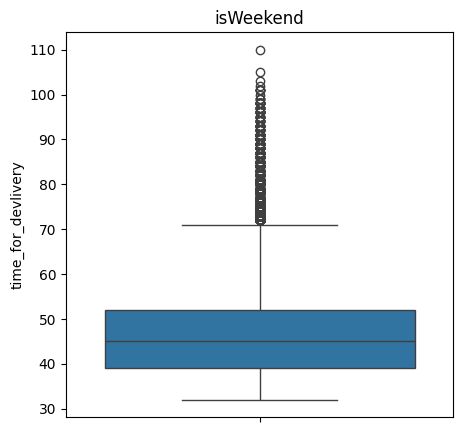

In [117]:
# Boxplot for time_taken

plt.figure(figsize=(5, 5))
sns.boxplot(y=y)
plt.title(col)

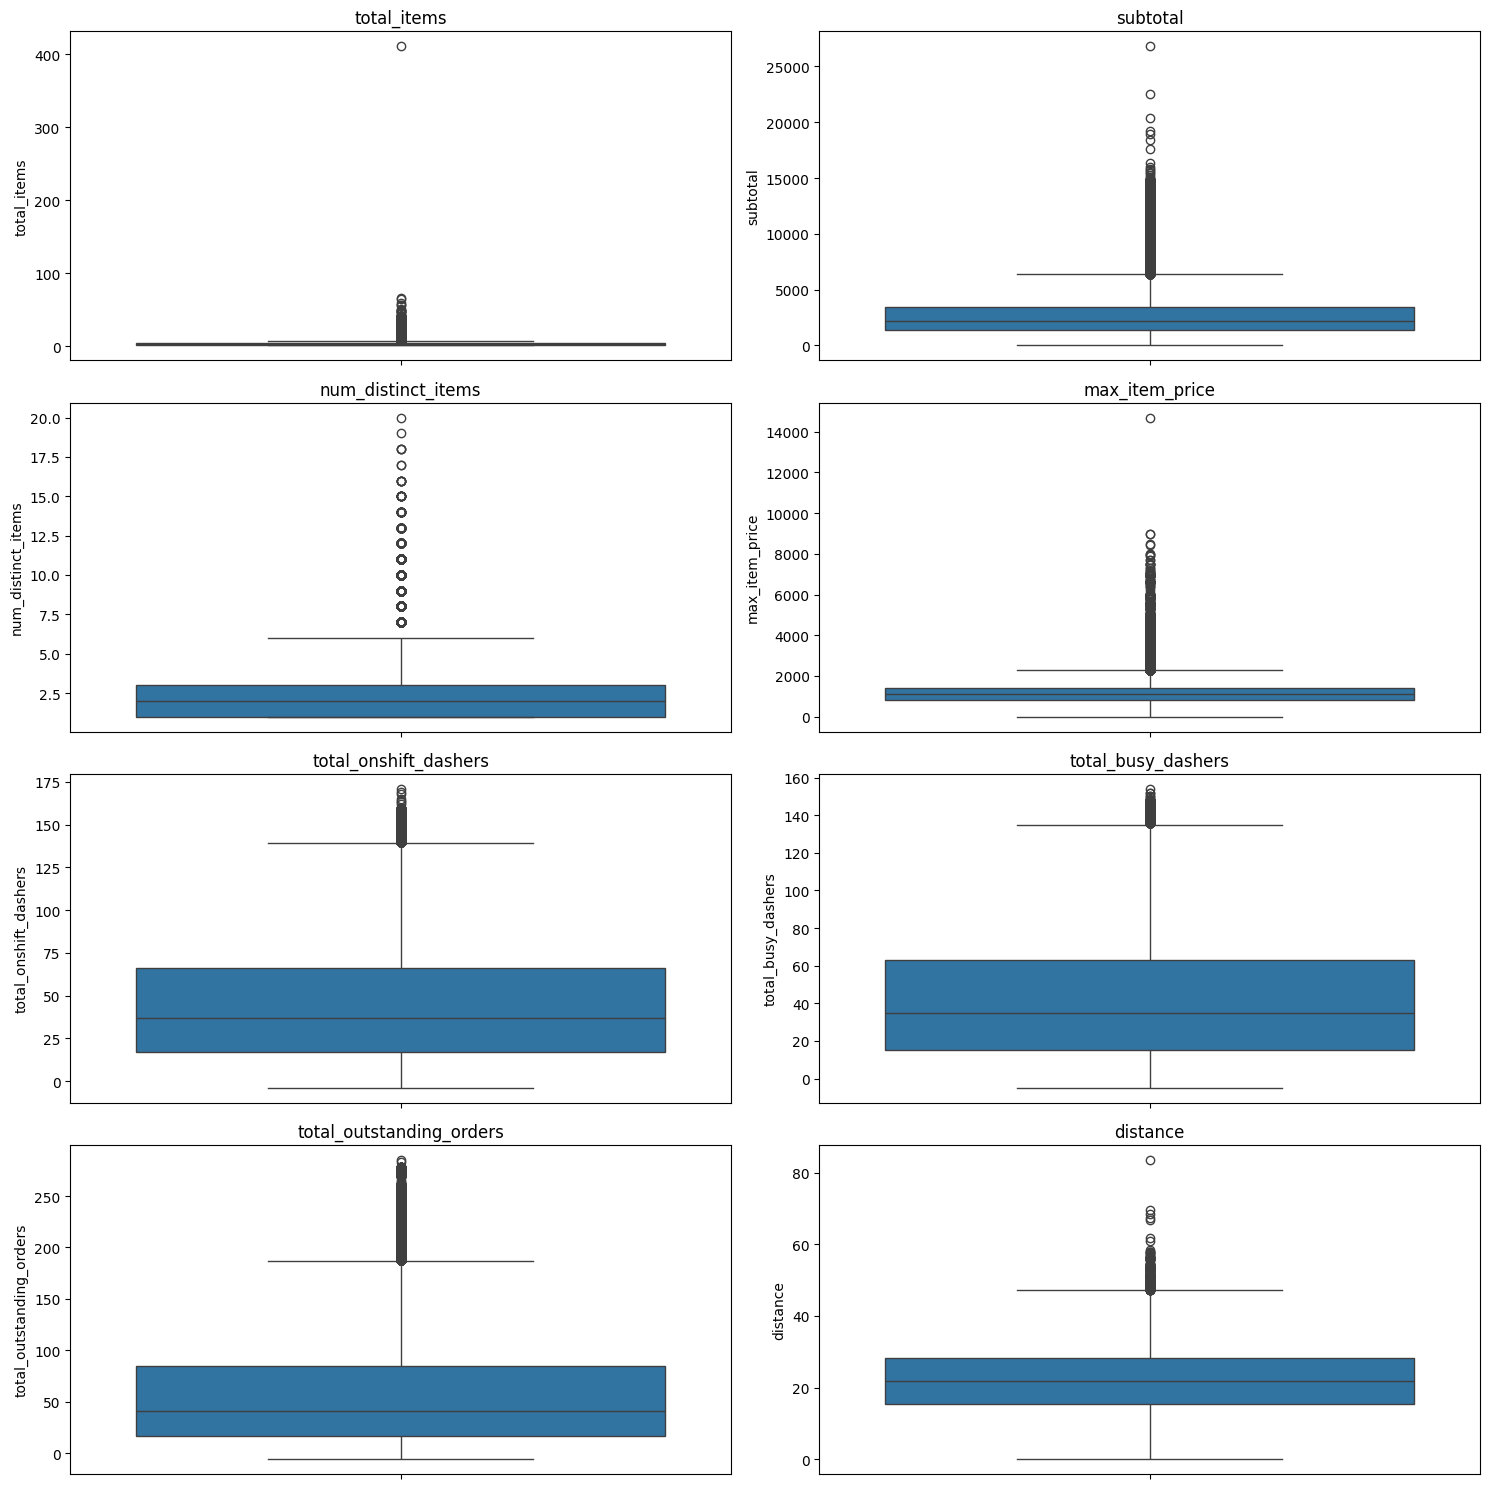

In [118]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols_updated):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [119]:
# Handle outliers

def Handle_outliers(df, columns):
    for col in columns:
        low_bound = df[col].quantile(0.1)
        up_bound = df[col].quantile(0.9)
        df[col] = np.clip(df[col], low_bound, up_bound)
    return df

X = Handle_outliers(X, num_cols_updated)

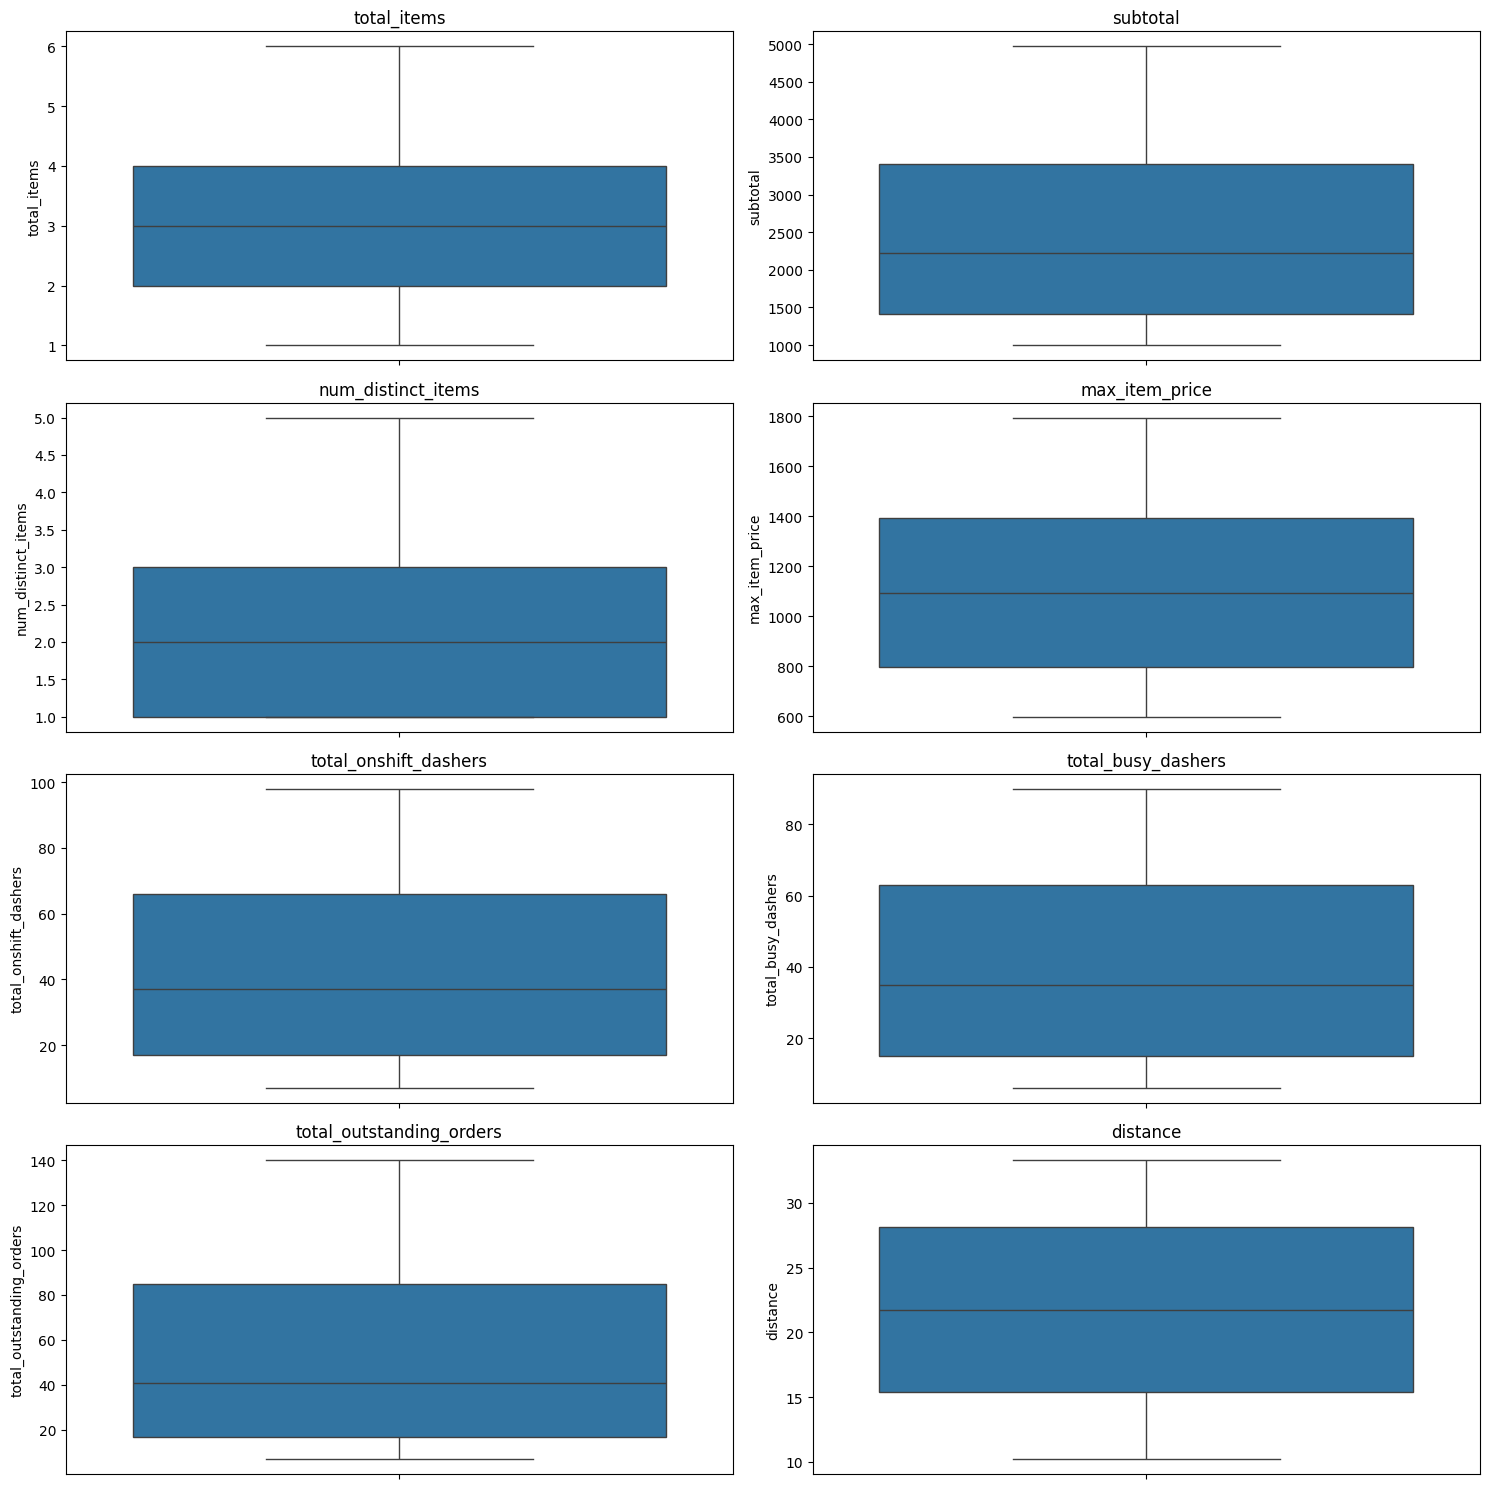

In [120]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols_updated):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [121]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
cata_cols = X_test.select_dtypes(include=['category']).columns.tolist()

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

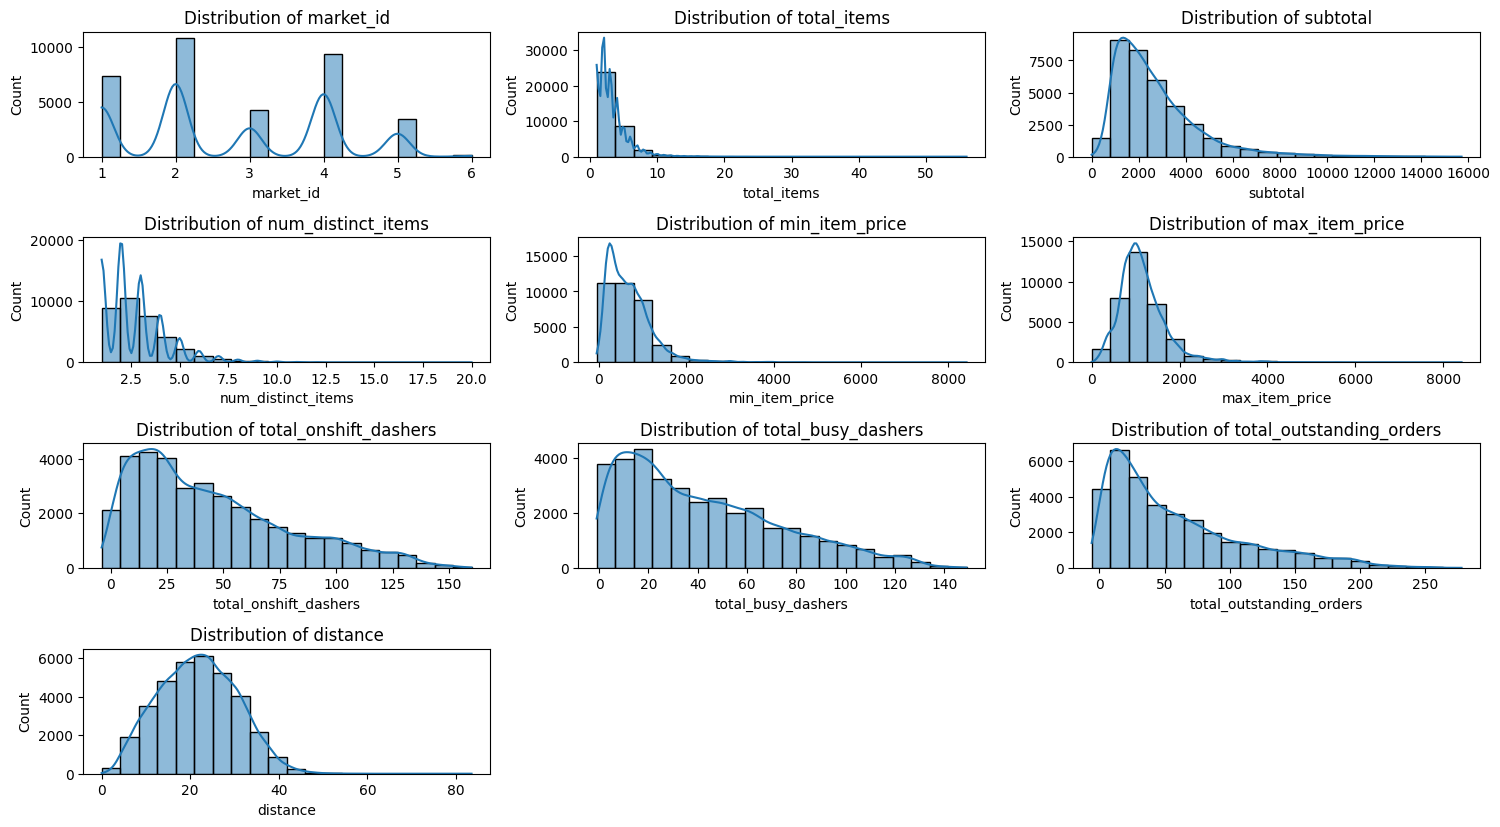

In [122]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i+1)
    sns.histplot(X_test[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

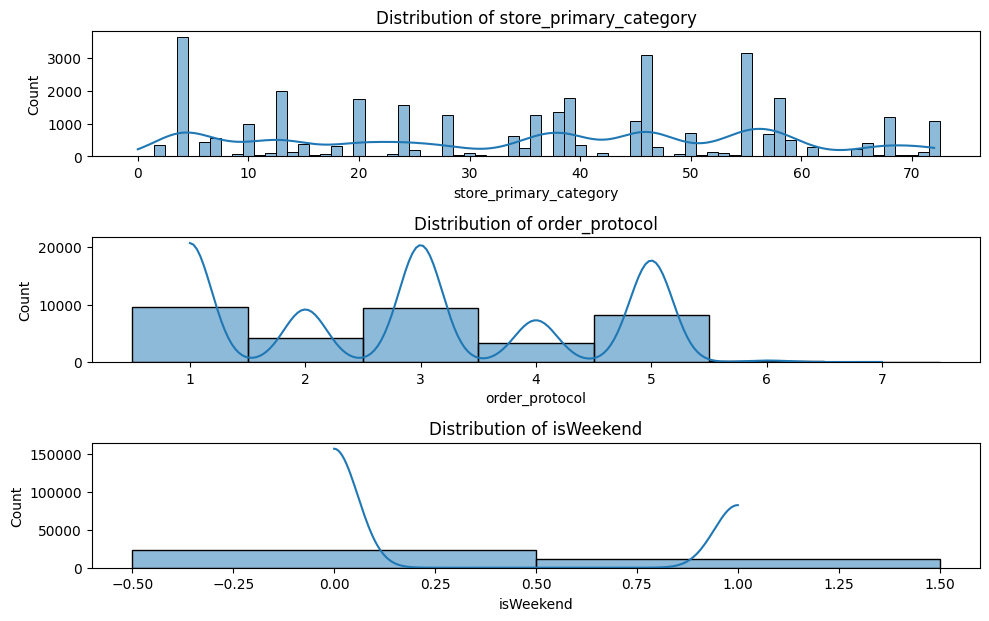

In [123]:
# Distribution of categorical columns

plt.figure(figsize=(10, 10))
for i, col in enumerate(cata_cols):
    plt.subplot(5, 1, i+1)
    sns.histplot(X_test[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

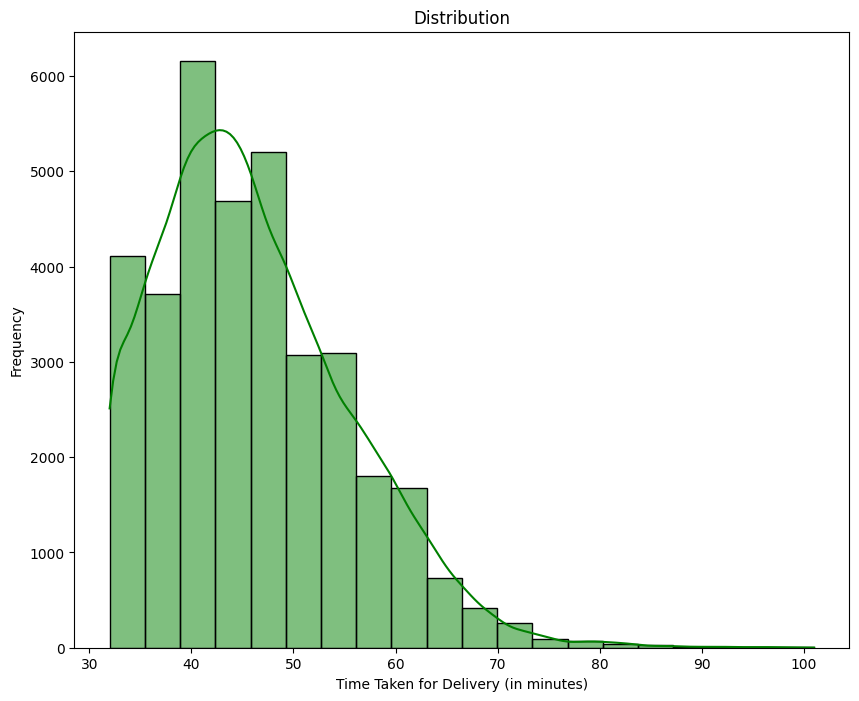

In [124]:
# Distribution of time_taken
plt.figure(figsize=(10, 8))
sns.histplot(y_test, bins=20, kde=True, color="green")
plt.title('Distribution')
plt.xlabel('Time Taken for Delivery (in minutes)')
plt.ylabel('Frequency')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

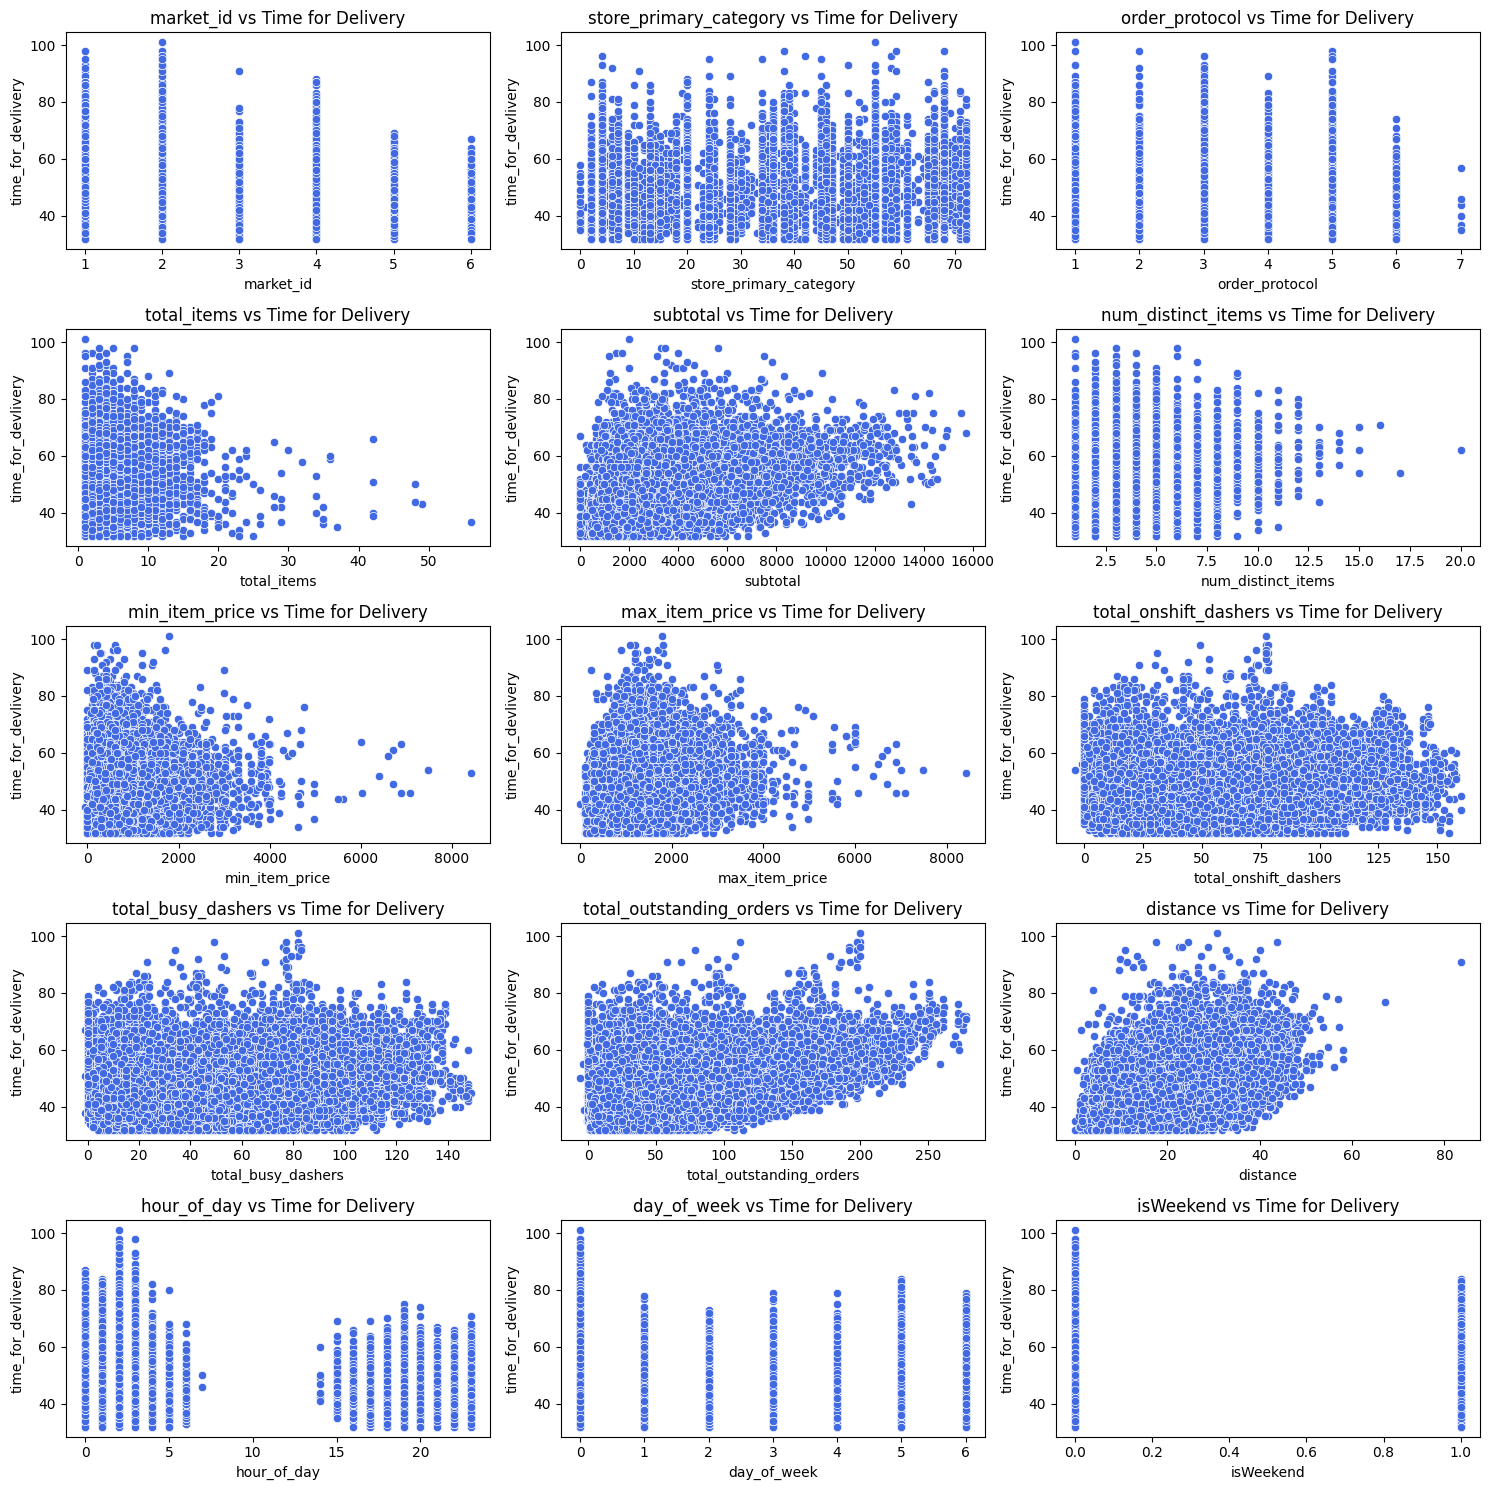

In [125]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    sns.scatterplot(x=X_test[feature], y=y_test, color = "royalblue")
    plt.title(f'{feature} vs Time for Delivery')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [126]:
# Drop the weakly correlated columns from training dataset

test_data = pd.concat([X_test, y_test], axis=1)

corr_rel = test_data.corr()
low_related_features = [col for col in corr_rel.columns if abs(corr_rel[col]['time_for_devlivery']) < 0.1]

test_data = test_data.drop(columns=low_related_features)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [127]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [128]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
X[num_cols_updated] = scaler.fit_transform(X[num_cols_updated])
X.head()


order_protocol  total_items     subtotal  num_distinct_items  \
0   1.000000e+00 6.000000e-01 6.153459e-01        7.500000e-01   
1   2.000000e+00 0.000000e+00 2.276730e-01        0.000000e+00   
2   3.000000e+00 6.000000e-01 9.499371e-01        5.000000e-01   
3   1.000000e+00 0.000000e+00 1.333333e-01        0.000000e+00   
4   1.000000e+00 2.000000e-01 6.603774e-01        2.500000e-01   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0    5.351171e-01           2.857143e-01        9.523810e-02   
1    6.697324e-01           0.000000e+00        0.000000e+00   
2    8.403010e-01           1.098901e-02        0.000000e+00   
3    7.742475e-01           0.000000e+00        0.000000e+00   
4    1.000000e+00           0.000000e+00        0.000000e+00   

   total_outstanding_orders     distance  hour_of_day isWeekend  
0              1.052632e-01 1.000000e+00           22         0  
1              0.000000e+00 7.525952e-01           21         0  
2              8.270677e-02 5.882353e-02            0         0  
3              7.518797e-03 9.342561e-01            3         0  
4              0.000000e+00 0.000000e+00            2         0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

In [129]:
test_data[num_cols_updated] = scaler.fit_transform(test_data[num_cols_updated])
test_data.head()

order_protocol  total_items     subtotal  num_distinct_items  \
33140    1.000000e+00 1.272727e-01 2.803310e-01        3.157895e-01   
59900    2.000000e+00 1.090909e-01 2.135582e-01        2.631579e-01   
155093   5.000000e+00 0.000000e+00 7.765754e-02        0.000000e+00   
97620    1.000000e+00 1.818182e-02 1.775939e-01        5.263158e-02   
92443    5.000000e+00 0.000000e+00 1.451305e-01        0.000000e+00   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
33140     1.366607e-01           1.036585e-01        8.000000e-02   
59900     8.853238e-02           3.414634e-01        4.333333e-01   
155093    1.218063e-01           3.353659e-01        3.466667e-01   
97620     2.370766e-01           4.268293e-02        2.666667e-02   
92443     2.115270e-01           1.707317e-01        1.266667e-01   

        total_outstanding_orders     distance  hour_of_day isWeekend  \
33140               5.985915e-02 2.308429e-01            0         0   
59900               2.922535e-01 3.534483e-01           21         1   
155093              2.394366e-01 1.910920e-01            4         0   
97620               3.521127e-02 3.721264e-01            1         1   
92443               1.232394e-01 1.757663e-01            2         1   

        time_for_devlivery  
33140         5.400000e+01  
59900         5.000000e+01  
155093        3.600000e+01  
97620         6.200000e+01  
92443         4.200000e+01

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [130]:
# Create/Initialise the model
lr_model = LinearRegression()

In [131]:
# Train the model using the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [132]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [133]:
# Find results for evaluation metrics

meanAbsErr = mean_absolute_error(y_test, y_pred)
rootMeanSqrErr = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {meanAbsErr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rootMeanSqrErr:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.33
Root Mean Squared Error (RMSE): 3.19
R² Score: 0.88


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [134]:
# Loop through the number of features and test the model

metrics_list = []

for num_feats in range(X_train.shape[1], 7, -1):
    selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats)
    selector.fit(X_train, y_train)

    chosen_features = X_train.columns[selector.support_]

    X_train_selected = X_train[chosen_features]
    X_test_selected = X_test[chosen_features]

    regressor = LinearRegression()
    regressor.fit(X_train_selected, y_train)

    y_estimated = regressor.predict(X_test_selected)

    mae_score = mean_absolute_error(y_test, y_estimated)
    rmse_score = np.sqrt(mean_squared_error(y_test, y_estimated))

    r2_metric = r2_score(y_test, y_estimated)

    metrics_list.append({"Feature Count": num_feats, "R² Score": r2_metric, "MAE": mae_score, "RMSE": rmse_score, "Chosen Features": chosen_features.tolist()})

metrics_df = pd.DataFrame(metrics_list)

# Display results
print(metrics_df.sort_values(by="R² Score", ascending=False))

   Feature Count     R² Score          MAE         RMSE  \
0             15 8.832001e-01 2.327598e+00 3.191658e+00   
1             14 8.830852e-01 2.329074e+00 3.193227e+00   
2             13 8.822408e-01 2.337797e+00 3.204738e+00   
3             12 8.417124e-01 2.777197e+00 3.715511e+00   
4             11 8.412281e-01 2.781793e+00 3.721191e+00   
5             10 8.412097e-01 2.782199e+00 3.721407e+00   
6              9 8.410267e-01 2.776953e+00 3.723550e+00   
7              8 8.210145e-01 2.940240e+00 3.950973e+00   

                                     Chosen Features  
0  [market_id, store_primary_category, order_prot...  
1  [market_id, store_primary_category, order_prot...  
2  [market_id, store_primary_category, order_prot...  
3  [market_id, store_primary_category, order_prot...  
4  [market_id, order_protocol, total_items, num_d...  
5  [market_id, order_protocol, num_distinct_items...  
6  [market_id, order_protocol, num_distinct_items...  
7  [market_id, order_protoco

In [135]:
# Build the final model with selected number of features

best_features = metrics_df.sort_values(by="R² Score", ascending=False).iloc[0]["Chosen Features"]

X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

best_model = LinearRegression()
best_model.fit(X_train_best, y_train)

y_final_pred = best_model.predict(X_test_best)

final_mae = mean_absolute_error(y_test, y_final_pred)
final_rmse_score = np.sqrt(mean_squared_error(y_test, y_estimated))
final_r2 = r2_score(y_test, y_final_pred)

In [136]:
print(f"Final Model Performance:\nMAE: {final_mae}\nRMSE: {final_rmse_score}\nR² Score: {final_r2}")

Final Model Performance:
MAE: 2.3275978697696353
RMSE: 3.950973032719884
R² Score: 0.8832000904585373


In [137]:
import joblib
joblib.dump(best_model, "Delivery_Time_Estimation_Model.pkl")

['Delivery_Time_Estimation_Model.pkl']

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Text(0.5, 1.0, 'Residuals vs Predicted')

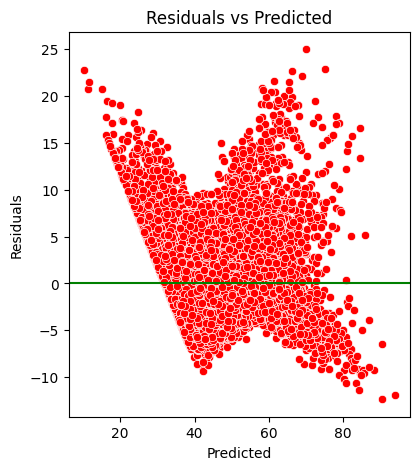

In [138]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats
#Scatter Plot

residuals = y_test - y_pred
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred, y=residuals, color = 'red')
plt.axhline(y=0, color='green', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

Text(0.5, 1.0, 'Q-Plot')

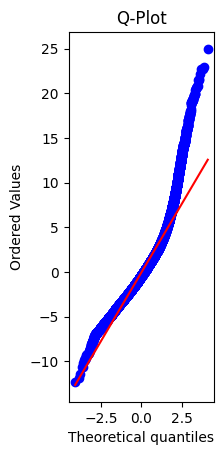

In [139]:
# Q Plot
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Plot')

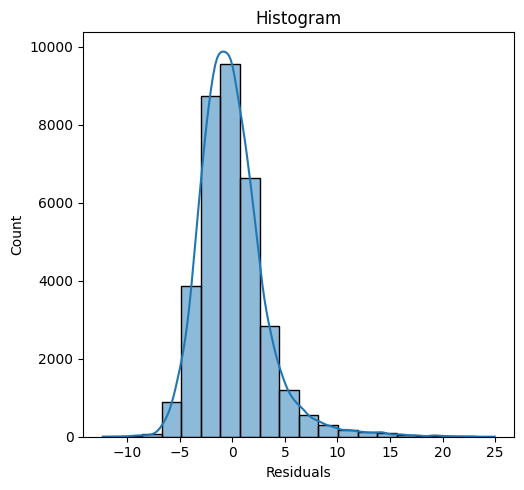

In [140]:
# Hist Plot

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.title('Histogram')
plt.tight_layout()
plt.show()

[Your inferences here:]
The residuals are comperatively on the higher side, the mode, can be further optimized to get the less residuals.


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [141]:
# Compare the scaled vs unscaled features used in the final model

from sklearn.preprocessing import StandardScaler

coefficients = best_model.coef_
features = best_features

coef_df = pd.DataFrame({"Feature": features, "Scaled Coefficient": coefficients})

scaler = StandardScaler()
scaler.fit(X_train[features])

unscaled_coefficients = []
for i, feature in enumerate(features):
    if scaler.scale_[i] != 0:
        unscaled_coefficients.append(coefficients[i] / scaler.scale_[i])
    else:
        unscaled_coefficients.append(np.nan)

coef_df["Unscaled Coefficient"] = unscaled_coefficients

coef_df["Abs Scaled Coefficient"] = coef_df["Scaled Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs Scaled Coefficient", ascending=False).drop(columns=["Abs Scaled Coefficient"])

pd.options.display.float_format = '{:.6e}'.format

print(coef_df)

                     Feature  Scaled Coefficient  Unscaled Coefficient
14                 isWeekend        1.649149e+00          3.467234e+00
2             order_protocol       -6.825023e-01         -4.507866e-01
0                  market_id       -6.236009e-01         -4.680650e-01
5         num_distinct_items        5.716690e-01          3.516557e-01
11                  distance        4.760219e-01          5.441081e-02
8      total_onshift_dashers       -3.584925e-01         -1.037362e-02
10  total_outstanding_orders        3.459890e-01          6.556162e-03
12               hour_of_day       -2.472722e-01         -2.849075e-02
9         total_busy_dashers       -1.429221e-01         -4.441384e-03
13               day_of_week       -1.216049e-01         -5.947845e-02
3                total_items       -3.602809e-02         -1.324421e-02
1     store_primary_category        5.833769e-03          2.812317e-04
4                   subtotal        1.244683e-03          6.788796e-07
7     

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [142]:
# Analyze the effect of a unit change in a feature, say 'total_items'
unit = 1
feature_coef = coef_df.loc[coef_df["Feature"] == 'total_items', "Unscaled Coefficient"].values[0]
time_change = unit * feature_coef

print(f"Changing 'total_items' by 1 unit affects delivery time by {time_change:.4f} minutes.")

Changing 'total_items' by 1 unit affects delivery time by -0.0132 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

store_primary_category, order_protocol, and isWeekend have a significant impact on delivery time.

The store category affects how long it takes to prepare the order.

Order protocol can cause delays in order placement, and delivery time tends to be longer on weekends.


##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

The test_size = 0.2 parameter means that 20% of the dataset will be used for testing, while the remaining 80% will be used for training. This helps evaluate the model’s performance on unseen data. If the training data is less the model performance may not be sccurate therefore the test size has to be appropriate.

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

The features most strongly affecting delivery time is Distance as Longer distances lead to longer delivery times.

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

To detect outliers, I used a boxplot and the interquartile range (IQR) method. Any values falling outside the 0.1 to 0.9 quantile range were adjusted to fall within appropriate limits. After making these adjustments, I rechecked the plot, and no outliers were present.

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

Based on the final model the possible top 3 features affecting the target variable(delivery time) are

Distance – Longer distances naturally increase delivery time.

isWeekend – Higher demand on weekends leads to delays.

Total Items – More items in an order increase preparation and packing time, delaying delivery.

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear regression is a supervised learning algorithm used for predicting a continuous target variable based on input features. It assumes a linear relationship between the input (X) and output (Y).

Equation : Y=c+mX

Types

Simple Linear Regression: Involves one independent variable (X) and one dependent variable (Y).

Multiple Linear Regression: Involves multiple independent variables affecting a single dependent variable.

Assumptions: Linearity, Independence, Homoscedasticity, No MultiCollinearity, Normality

Metrics : Mean Absolute Error(MAE),Mean Squared Error(MSE), Root Mean Squared Error (RMSE), R² Score

##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

Simple Linear Regression involves only one independent variable to predict the dependent variable.

Equation:y=b0+b1x+ϵ

Simple Intrepretation

------
Multiple Linear Regression uses two or more independent variables to predict the dependent variable.

Equation:y=b0​+b1​x1​+b2​x2​+...+bn​xn​+ϵ

Complex Intrepretation

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


The cost function in linear regression measures how well the model's predicted values match the actual values.The most common cost function in linear regression is the Mean Squared Error (MSE)

To Optimize the following can be used

1. Gradient Descent: Adjusts model parameters step by step
2. Ordinary Least Squares (OLS): Finds the best-fit line by directly

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting: The model learns too much from the training data, including unnecessary details. It performs well on training data but poorly on new data.

Underfitting: The model is too simple and does not learn enough patterns. It performs poorly on both training and test data.

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots help determine if a linear regression model is fitting the data well. If the residuals (differences between actual and predicted values) are scattered randomly, the model is likely a good fit.